# RED WINE QUALITY EDA 🍷

Bu notebookta exploratory data analysis (EDA) yaparak veriyi tanımak, görselleştirmek, betimsel istatistiklerine bakmak vb. işlemleri gerçekleştireceğiz. Amacımız veri setini oluşturan değişkenleri tanımak ve anlamak.

In [1]:
# gerekli kütüphaneler
import numpy as np  # sayısal işlemler 
import pandas as pd  # veri manipülasyonu 
import seaborn as sns  # görselleştirme
import matplotlib.pyplot as plt  # görselleştirme

# görsel çıktılardaki uyarı mesajları için
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# verinin wine değişkenine yüklenmesi
wine = pd.read_csv('winequality-red.csv')

In [3]:
wine.head() # verinin ilk 5 satırı

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Veri setinin hikayesi nedir?

Bu veri seti, Cortez ve meslektaşları tarafından 2009 yılında oluşturulmuştur. Portekiz'deki Vinho Verde bölgesinde üretilen kırmızı şarapların kalitesini tahmin etmek için kullanılan fiziksel ve kimyasal özelliklerin bir araya getirilmesinden oluşur.

Veri seti, 2009 yılında yayınlanan "Modeling wine preferences by data mining from physicochemical properties" adlı makalede kullanılmıştır. Bu makalede, Cortez ve meslektaşları, şarap kalitesinin tahmin edilmesi için çeşitli makine öğrenimi algoritmalarını uygulamışlardır.

Makaleye ulaşmak için [buraya](https://core.ac.uk/works/9801492) tıklayınız.

Vinho Verde şarapları sosyal medya hesapları: [YouTube](https://www.youtube.com/@VinhoVerdeOficial/videos), [Instagram](https://www.instagram.com/vinhoverdewines/), [Twitter](https://twitter.com/vinhoverdewines). 

Veri setinin Kaggle sayfası için [buraya](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?datasetId=4458&sortBy=voteCount) tıklayınız.

🎯Bizim veri setindeki amacımız makine öğrenmesini kullanarak hangi fizikokimyasal özelliklerin bir şarabı "iyi" yaptığını belirlemektir.

### Veri setindeki özellikler neyi ifade ediyor?
<div style="float: left;">
    

| Feature | Anlam |
| --- | --- |
| fixed acidity | Şaraptaki sabit asitlik miktarı (g/tartarik asit) |
| volatile acidity | Şaraptaki uçucu asitlik miktarı (g/asetik asit) |
| citric acid | Şaraptaki sitrik asit miktarı (g) |
| residual sugar | Şaraptaki kalıntı şeker miktarı (g) |
| chlorides | Şaraptaki klorür (tuz) miktarı (g/sodyum klorür) |
| free sulfur dioxide | Şaraptaki serbest kükürt dioksit miktarı (mg) |
| total sulfur dioxide | Şaraptaki toplam kükürt dioksit miktarı (mg) |
| density | Şarabın yoğunluğu (g/ml) |
| pH | Şarabın asidite seviyesini gösteren pH değeri |
| sulphates | Şaraptaki sülfat miktarı (g/potasyum sülfat) |
| alcohol | Şaraptaki alkol yüzdesi (%) |
| quality | Şarabın kalitesi (3-8 arası puan) |

Orjinal veri setinin yapısını korumak için `copy()` metodu ile veri setinin yedeğini alıyoruz.

In [4]:
df = wine.copy()

In [5]:
df.tail() # verinin son 5 satırı

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
# verinin satır ve sutun sayısı
df.shape 

(1599, 12)

Verinin boyutuna baktığımızda 1599 satırdan ve 12 sütundan oluştuğunu görüyoruz. 

In [7]:
# veri setinin yapısal bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Veri setindeki tüm değerler sayısal veri tipinde. 11 adet float64 ve 1 adet de int64  tipinde değişken mevcut.

Bu çıktıdan görebildiğimiz bir diğer önmeli bilgi ise sütunlardaki boş değer sayısıdır. Çıktıdan görüldüğü üzere tüm süm sütunlarda boş değer yoktur (non-null).

In [ ]:
# bazı yararlı pandas metodları
df.dtypes # sadece değişken tiplerine ulaşmak için
df.columns # sadece sütun isimlerine ulaşmak için
df.shape # sadece veri setinin boyutuna ulaşmak için
df.isnull().values.any() # veri setinde hiç eksik değer var mı? (True/False)
df.isnull().sum() # hangi değişkende kaçar tane eksik değer var?

## Betimsel İstatistikler

Betimsel istatistikler ile veri setindeki sayısal değerlerin ortalamadan ne denli uzakta olduğunu gözlemleriz. Kabaca, amacımız veri setindeki özelliklerin merkezi eğilimlerini ve dağılımlarını gözlemlemek olacak. Pandas'ta bunun için `describe()` metodu vardır. Bu metod eksik gözlemleri göz ardı eder ve kategorik (sayısal olmayan) değişkenleri de hesaba katmaz. 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


İlk gözüme çarpan şey, tabloda negatif bir değer bulunmaması zaten bir ürünün içerisinde negatif değerli bir oran olamazdı. Buradan veri setinin tutuarlı olduğu söylenebilir. Sadece sitrik asit değerinin minimumu 0 olarak gözüküyor, bu düşündürücü. Strik asit, şarap yapımında doğal olarak bulunan bir asittir, dolayısıyla en düşük değerin 0 olması çok olası gözükmüyor. Ayrıca küçük miktarlarda bulunan sitrik asit şaraplara tazelik ve lezzet katabilir. Veri setindeki sıfır değerlerinin tamamen gerçek olduğundan emin olmak için alan bilgisine sahip bir insana danışmak ve daha ayrıntılı bir inceleme yapmak gerekebilir.

Artık şeker miktarına baktığımızda min ile max arasında ciddi bir fark olduğu görülüyor. Fermantasyon işleminden sonra şarabın içerisinde kalan şekeri temsil eden bu değişken şarabın sek olup olmayışını etkiler. Genel olarak piyasadaki şaraplar sektir. Sek şarap ise ortalama olarak listesinde 4 gramdan az şeker bulunduran şaraptır. Dolayısıyla artık şeker değişkenine baktığımızda aykırı değerler olduğu ve hatta dağılımının da sağa çarpık olduğunu olduğunu bu tabloya bakarak söyleyebilirim. Fakat artık şeker miktarının şarabı kaliteli veya kalitesiz olarak niteleyebilecek bir etkisi yoktur.

Bir başka değişken sülfür dioksitin de min ve max değerleri arasında ciddi bir fark var gibi gözükse de bu esasen sülfür dioksit miktarı için olabilecek bir durumdur. Bu madde şaraba koruyucu, antioksidan ve antimikrobiyal olarak eklenir. Şarabın tadını, aromasını, rengini ve ömrünü etkiler. Kesin bir ölçüsü yoktur üretici tercihi olarak izin verilen max üst sınıra kadar şaraba etken madde olarak koyulabilir. Bu sınır da kırmızı şarap için 300 mg/l'dir. Tabloya baktığımızda sınırın geçilmediği görülüyor.

### Kalite değişkenine göre şarapları gruplayarak diğer özelliklerin kalite değişkeni ile alakasına sezgisel olarak bakabiliriz

In [10]:
pd.set_option('display.max_columns', None) # tüm sutunları göstermesi icin
df.groupby('quality').agg(['std','mean','min','max'])

fixed acidity                      volatile acidity                  \
                  std      mean  min   max              std      mean   min   
quality                                                                       
3            1.770875  8.360000  6.7  11.6         0.331256  0.884500  0.44   
4            1.626624  7.779245  4.6  12.5         0.220110  0.693962  0.23   
5            1.563988  8.167254  5.0  15.9         0.164801  0.577041  0.18   
6            1.797849  8.347179  4.7  14.3         0.160962  0.497484  0.16   
7            1.992483  8.872362  4.9  15.6         0.145224  0.403920  0.12   
8            2.119656  8.566667  5.0  12.6         0.144914  0.423333  0.26   

               citric acid                       residual sugar            \
           max         std      mean   min   max            std      mean   
quality                                                                     
3        1.580    0.250664  0.171000  0.00  0.66       1.401596  2.635000   
4        1.130    0.201030  0.174151  0.00  1.00       1.789436  2.694340   
5        1.330    0.180003  0.243686  0.00  0.79       1.359753  2.528855   
6        1.040    0.195108  0.273824  0.00  0.78       1.441576  2.477194   
7        0.915    0.194432  0.375176  0.00  0.76       1.371509  2.720603   
8        0.850    0.199526  0.391111  0.03  0.72       1.295038  2.577778   

                   chlorides                         free sulfur dioxide  \
         min   max       std      mean    min    max                 std   
quality                                                                    
3        1.2   5.7  0.066241  0.122500  0.061  0.267            9.763879   
4        1.3  12.9  0.076192  0.090679  0.045  0.610            9.025926   
5        1.2  15.5  0.053707  0.092736  0.039  0.611           10.955446   
6        0.9  15.4  0.039563  0.084956  0.034  0.415            9.940911   
7        1.2   8.9  0.029456  0.076588  0.012  0.358           10.175255   
8        1.4   6.4  0.011678  0.068444  0.044  0.086           11.155613   

                              total sulfur dioxide                          \
              mean  min   max                  std       mean   min    max   
quality                                                                      
3        11.000000  3.0  34.0            16.828877  24.900000   9.0   49.0   
4        12.264151  3.0  41.0            27.583374  36.245283   7.0  119.0   
5        16.983847  3.0  68.0            36.993116  56.513950   6.0  155.0   
6        15.711599  1.0  72.0            25.038250  40.869906   6.0  165.0   
7        14.045226  3.0  54.0            33.191206  35.020101   7.0  289.0   
8        13.277778  3.0  42.0            25.433240  33.444444  12.0   88.0   

          density                                    pH                        \
              std      mean      min      max       std      mean   min   max   
quality                                                                         
3        0.002002  0.997464  0.99471  1.00080  0.144052  3.398000  3.16  3.63   
4        0.001575  0.996542  0.99340  1.00100  0.181441  3.381509  2.74  3.90   
5        0.001589  0.997104  0.99256  1.00315  0.150618  3.304949  2.88  3.74   
6        0.002000  0.996615  0.99007  1.00369  0.153995  3.318072  2.86  4.01   
7        0.002176  0.996104  0.99064  1.00320  0.150101  3.290754  2.92  3.78   
8        0.002378  0.995212  0.99080  0.99880  0.200640  3.267222  2.88  3.72   

        sulphates                         alcohol                        
              std      mean   min   max       std       mean  min   max  
quality                                                                  
3        0.122020  0.570000  0.40  0.86  0.818009   9.955000  8.4  11.0  
4        0.239391  0.596415  0.33  2.00  0.934776  10.265094  9.0  13.1  
5        0.171062  0.620969  0.37  1.98  0.736521   9.899706  8.5  14.9  
6        0.158650  0.675329  0.40  1.95 

## Pandas Profiling

Bizim için detaylı analizler yapan pandas_profiling kütüphanesini de veri üzerinde kullanacağım. Bu kütüphane özet istatistikleri interaktif bir HTML sayfası olarak bize sunuyor.

In [11]:
#import ydata_profiling
#rapor = ydata_profiling.ProfileReport(df)
#rapor.to_file("index.html")

**Sonuç raporu GitHub'a yüklendiğinde gözükmüyor ancak localde çalıştırıldığında çıktısı görülebilir. Bundan ötürü raporu index.html olarak kaydedip GitHub Pages ile canlıya aldım [buradaki](https://enesmanan.github.io/Patika-Veri-Bilimi/DS-101-Bitirme-Projesi/) adresten Pandas Profiling raporunu inceleyebilirsin.**

## Görselleştirme

### Olasılık Dağılım Grafikleri

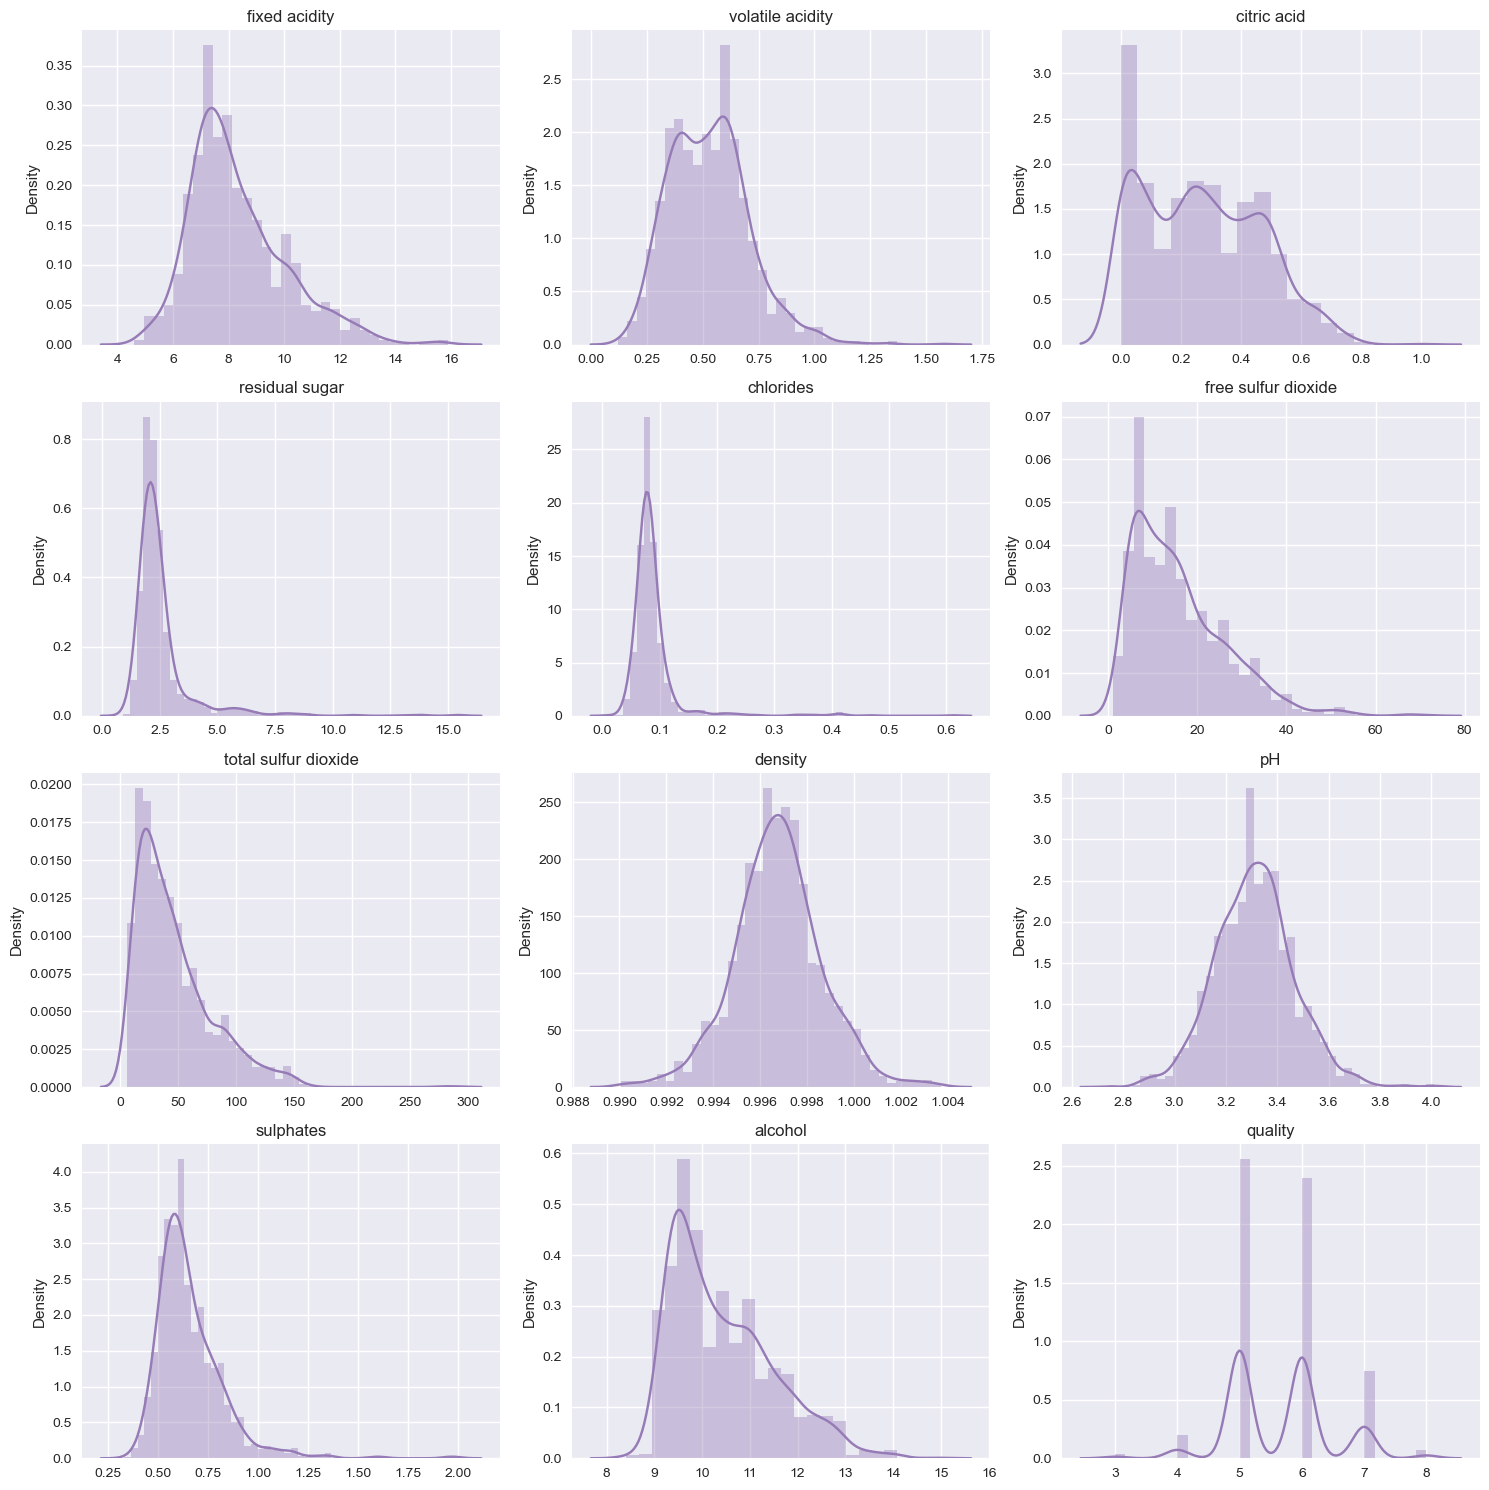

In [12]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(15,15))
for index,column in enumerate(df.columns):
    plt.subplot(4,3,index+1)
    sns.distplot(x = df.loc[:, column], color = '#967bb6')
    plt.title(column, size = 12)
    fig.tight_layout()
    plt.grid(True)
plt.show()

Çıktıya baktığımızda featureların olasılık yoğuluk fonksiyonlarının neye benzediği görülebilir. Quality değişkeni kesikli değerler oluştuğu için onu alt hücrede pasta ve sutun grafiği olarak yeniden ele almak daha doğru olacaktır.

Dağılımların şekline baktığımda bariz bir şekilde aykırı değerlerin olduğu gözüme çarpıyor. Sulphates, chlorides ve residual sugar değişkenlerinde aykırı değerler grafikten gözlemlenebiliyor. İleride model kurarken modelin başarısını olumsuz etkileyebileceği için bu değerleri tekrar ele alacağız. Bu değişkenlerdeki aykırı değerleri silsek, dağılımlar normal dağılım özelliği gösterebilir.

Density ve pH normal dağılım gösterirken alcohol, fixed acidity ve sulfur dioxide dağılımlarının hafif sağa çarpık olduğu görülüyor.

Volatile acidity çift tepeli dağılım gösterirken citric acid 3 tepeli bir dağılım göstermiş. Tepe sayısının birden fazla olması dağılımın birden fazla modu olduğuna işaret eder.

### Quality değişkeni

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

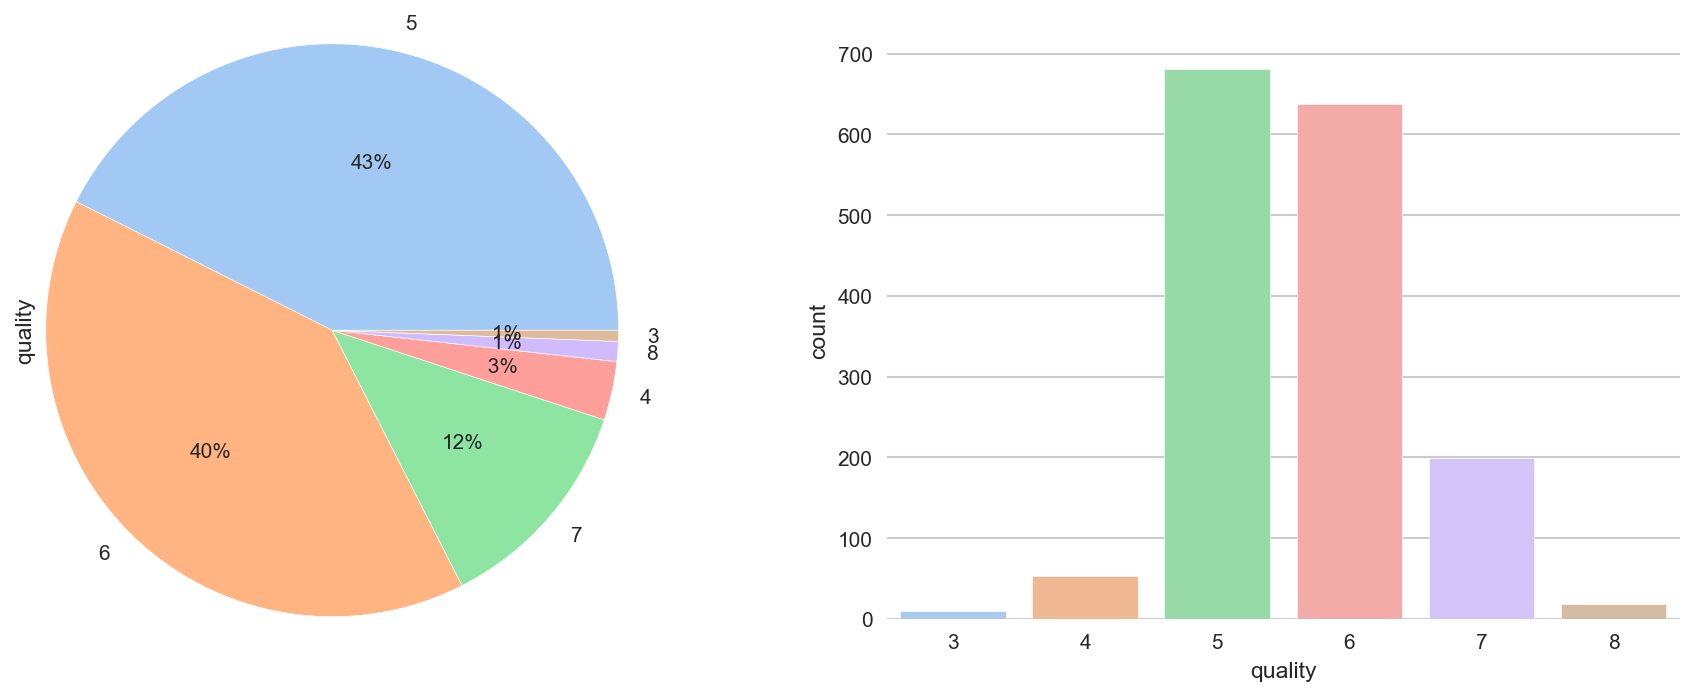

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5), dpi=150)
plt.subplot(121)
df['quality'].value_counts().plot(kind='pie', autopct='%2.f%%', radius=1.24, colors=sns.color_palette('pastel'))
plt.subplot(122)
sns.countplot(data=df, x='quality', palette='pastel')
df['quality'].value_counts()

Grafiklerden görüldüğü üzere veri setindeki şarapların büyük çoğunluğu 5 ve 6 kalitesinden oluşuyor. Veri setindeki kalite aralığına göre en aşağı ve en yukarıdaki kalitedeki şaraplar %1'i geçmiyor. Ortalama kalitde şaraplardan oluşan bir veri seti olduğunu söyleyebiliriz. Kalite değişkeni de dengeli bir şekilde normal dağılımı koruyor.

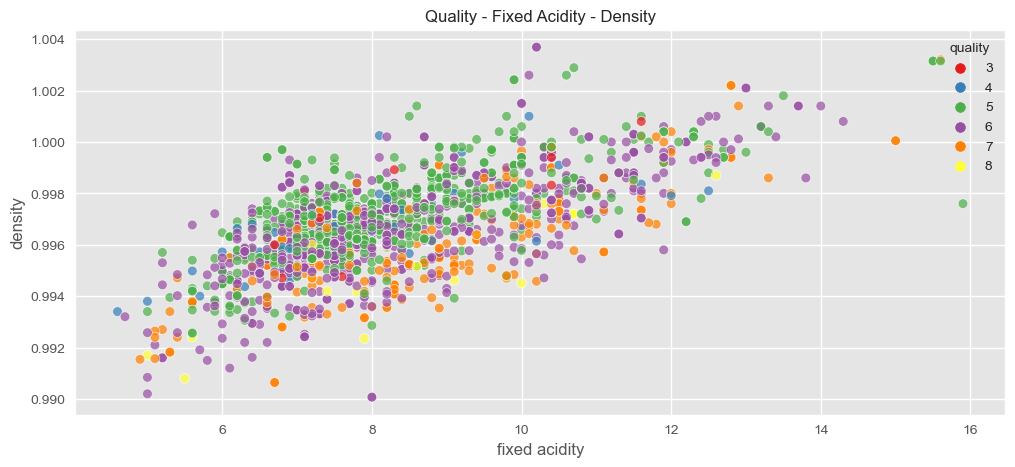

In [27]:
plt.figure(figsize = (12,5))
sns.scatterplot(x = "fixed acidity", y = "density", hue = "quality",data = df, alpha = 0.7, palette = "Set1")
plt.title("Quality - Fixed Acidity - Density", size = 12)
plt.show()

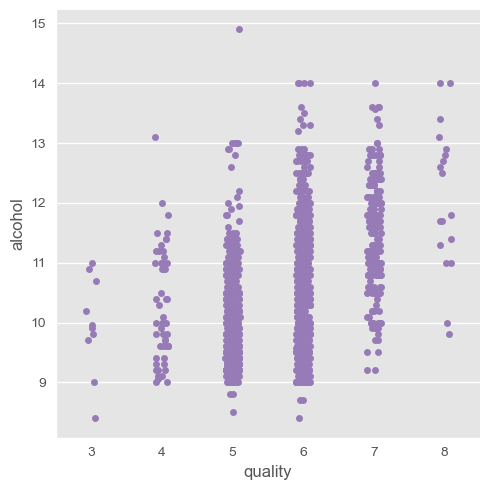

In [17]:
sns.catplot(x='quality', y='alcohol', data=df, color='#967bb6')

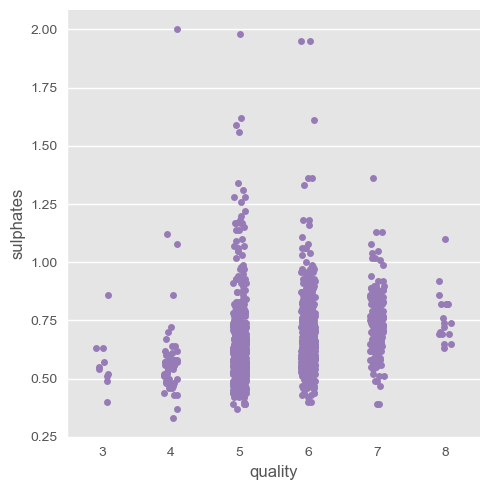

In [16]:
plt.style.use('ggplot')
sns.catplot(x='quality', y='sulphates', data=df, color='#967bb6')

In [21]:
sifir_sitrik_asit = df[df['citric acid'] == 0].count()
print(len(sifir_sitrik_asit))

12


In [24]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
